# WALKTHROUGH

In [52]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
df.shape

(537577, 12)

In [8]:
del df['Product_Category_2']
del df['Product_Category_3']
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

# analyze column

In [10]:
df['User_ID'].nunique()

5891

In [11]:
df['Product_ID'].nunique()

3623

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [15]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [19]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [20]:
df['Purchase'].sum()

5017668378

In [21]:
for column in df.columns:
    print(column,df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


# Analyzing gender


In [26]:
data=pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data

,Ratio
Male,405380
Female,132197


<AxesSubplot:ylabel='Ratio'>

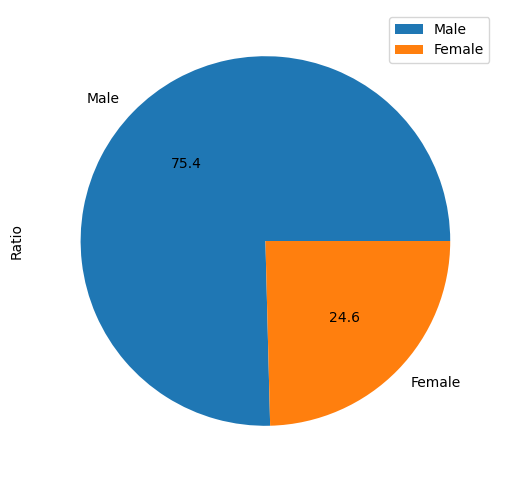

In [27]:
data.plot.pie(y='Ratio',figsize=(6,6),autopct="%.1f")

<AxesSubplot:ylabel='Purchase'>

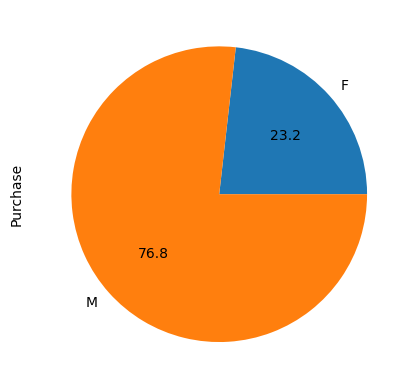

In [29]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct="%.1f")

<AxesSubplot:title={'center':'Average purchase'}, ylabel='Purchase'>

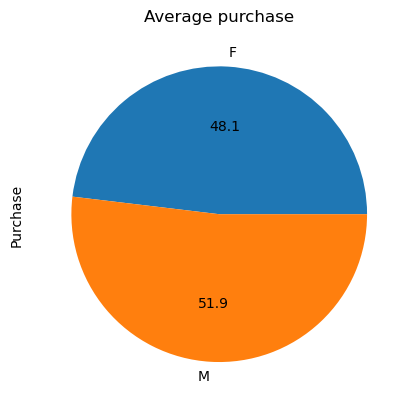

In [31]:
df.groupby('Gender').mean()['Purchase'].plot(title='Average purchase',kind='pie',autopct="%.1f")

# Analyzing age and marital status

In [32]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<AxesSubplot:title={'center':'purchase dist. by age'}, xlabel='Age'>

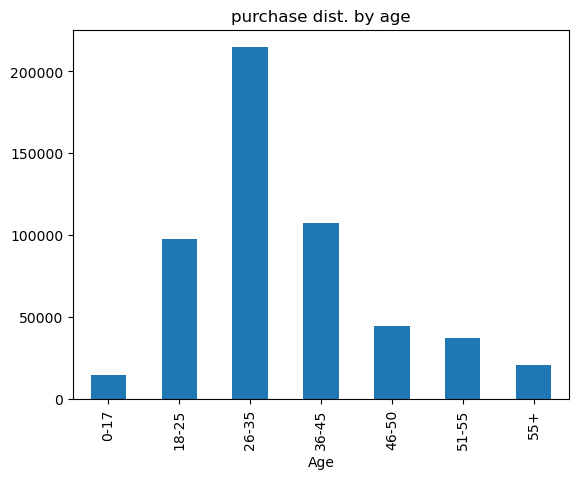

In [34]:
df.groupby('Age').size().plot(kind='bar',title='Purchase Distribution by age')

In [35]:
for i in df['Age'].unique():
    print(i,":",len(df[df['Age']==i]))
    

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


In [42]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data=pd.DataFrame(lst,columns=['Age','Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<AxesSubplot:xlabel='Age'>

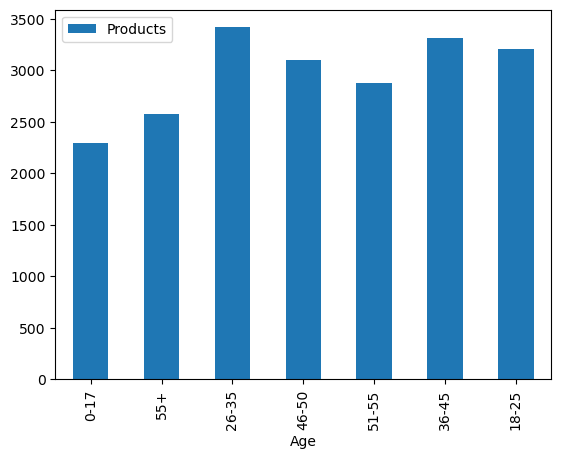

In [43]:
data.plot.bar(x='Age')

<AxesSubplot:title={'center':'Average Amount Spent by age'}, xlabel='Age'>

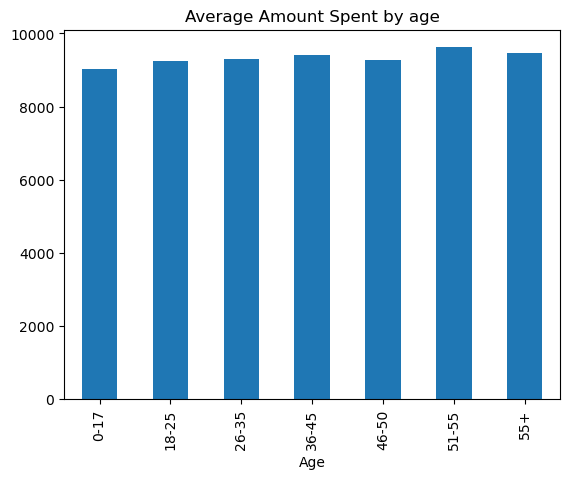

In [48]:
df.groupby('Age').mean()['Purchase'].plot(kind='bar',title='Average Amount Spent by age')

<AxesSubplot:title={'center':'Amount Spent by age'}, ylabel='Purchase'>

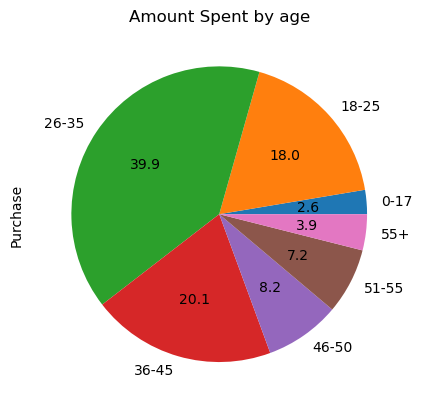

In [47]:
df.groupby('Age').sum()['Purchase'].plot(kind='pie',title='Amount Spent by age',autopct="%.1f")

<AxesSubplot:title={'center':'Marital status'}, ylabel='None'>

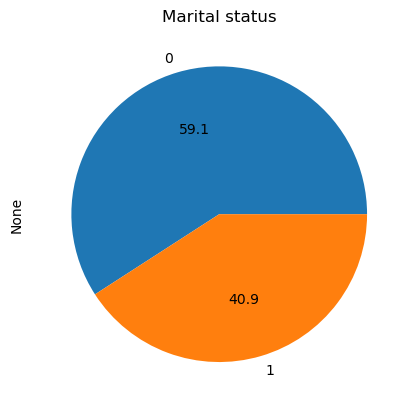

In [51]:
df.groupby('Marital_Status').size().plot(kind='pie',title='Marital status',autopct="%.1f")

# Multi column analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

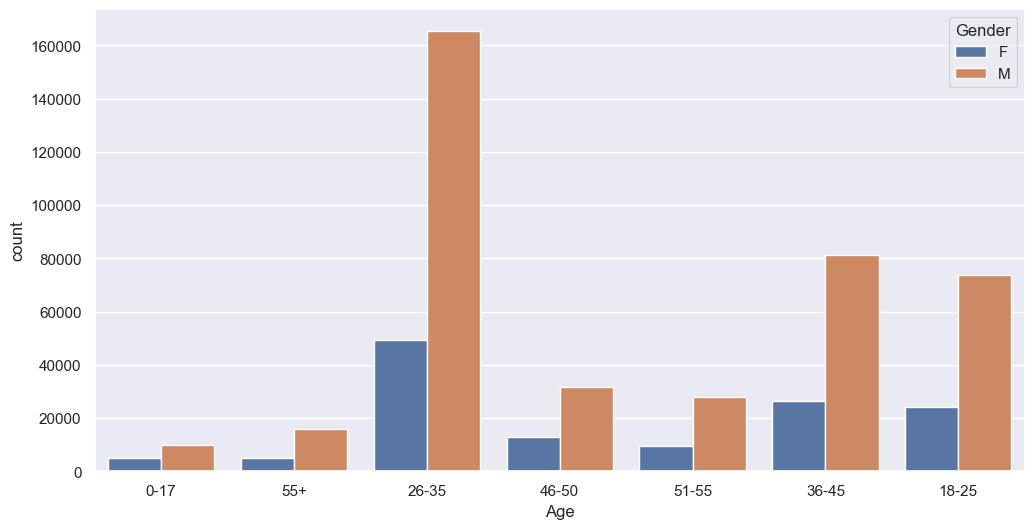

In [54]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age',hue='Gender',data=df)


<AxesSubplot:xlabel='Gender', ylabel='count'>

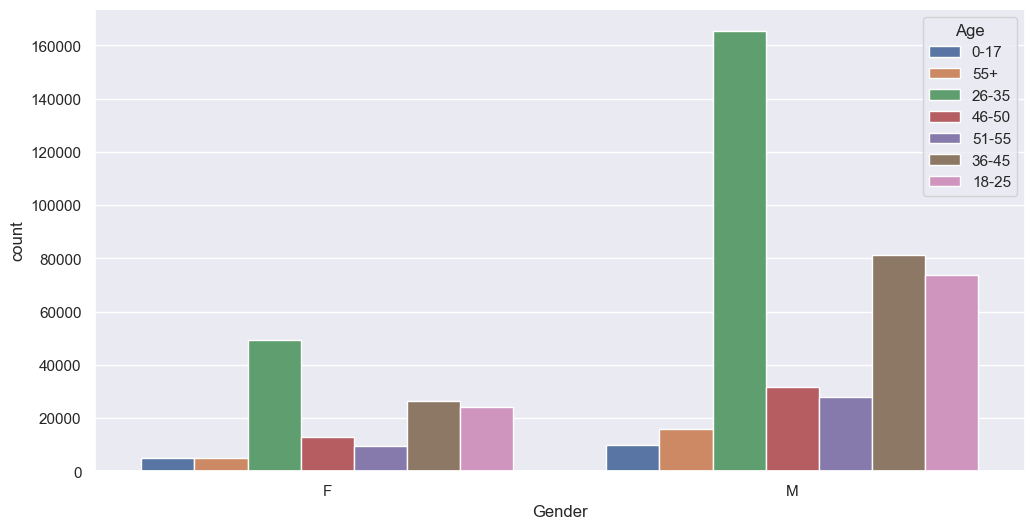

In [63]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender',hue='Age',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

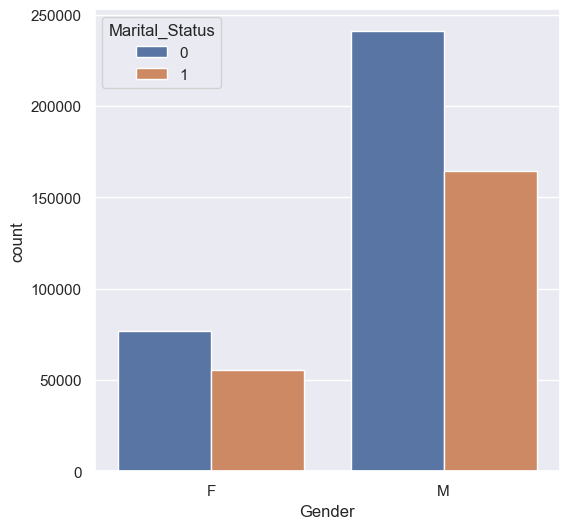

In [57]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

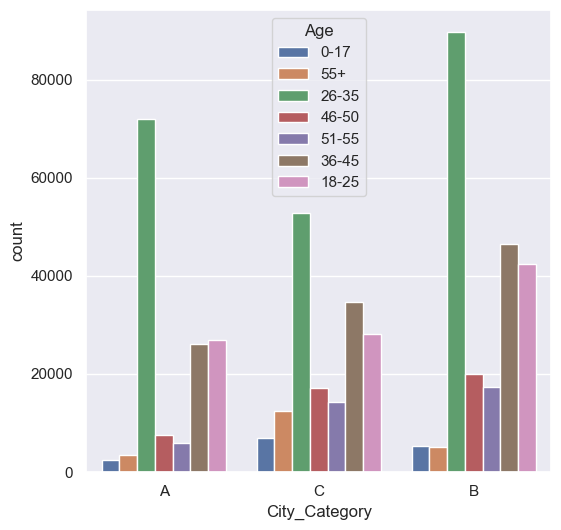

In [60]:
sns.countplot(x=df['City_Category'],hue='Age',data=df)

<AxesSubplot:ylabel='None'>

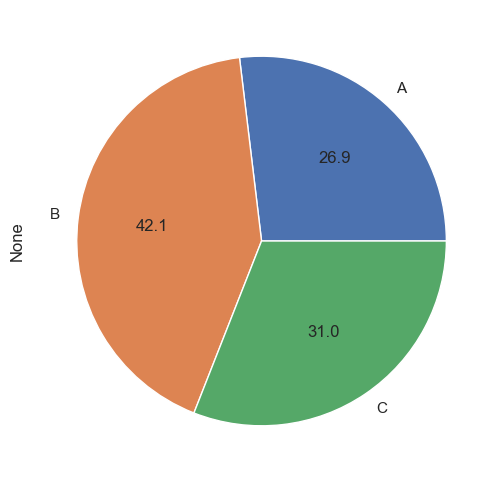

In [59]:
df.groupby('City_Category').size().plot(kind='pie',autopct="%.1f")

<AxesSubplot:ylabel='Purchase'>

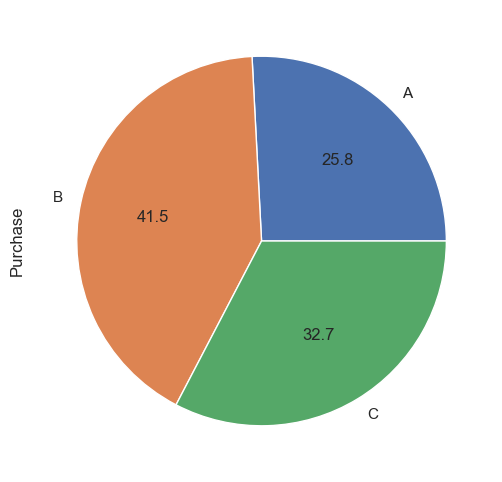

In [64]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct="%.1f")

<AxesSubplot:ylabel='Purchase'>

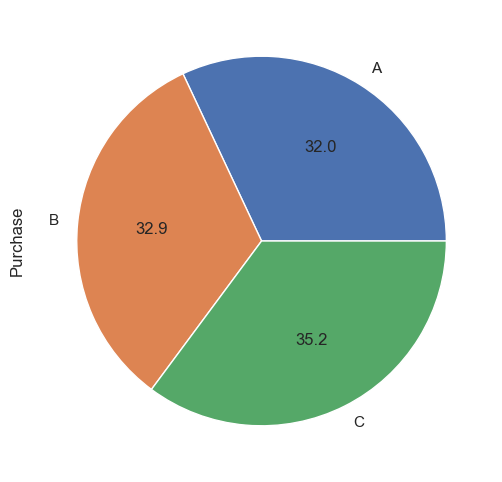

In [65]:
df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',autopct="%.1f")

# Occupation and product analysis

In [66]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

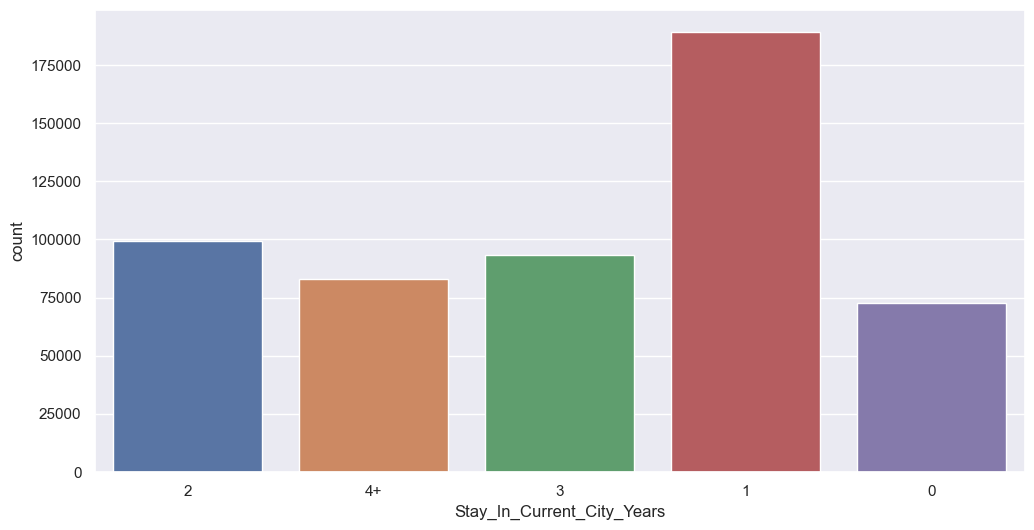

In [67]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

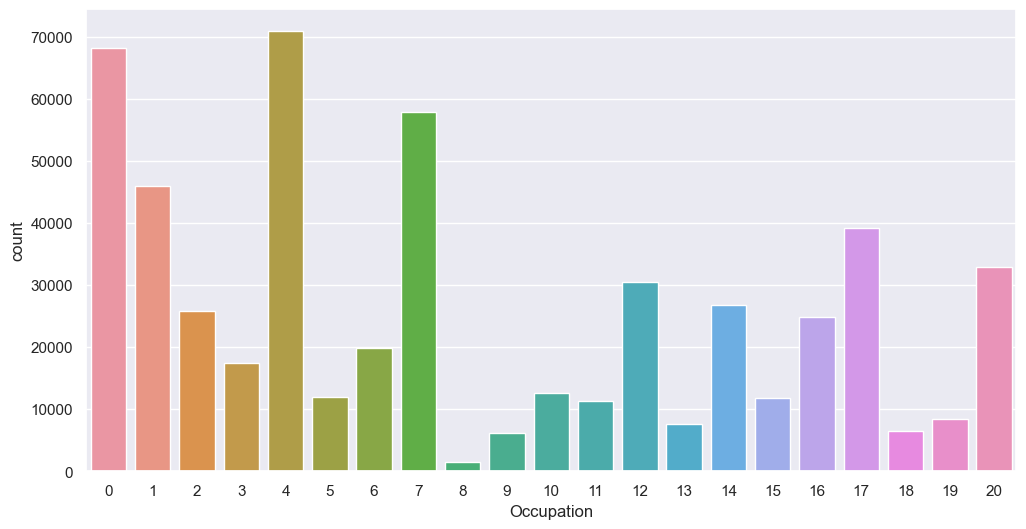

In [68]:
sns.countplot(x=df['Occupation'])

<AxesSubplot:xlabel='Occupation'>

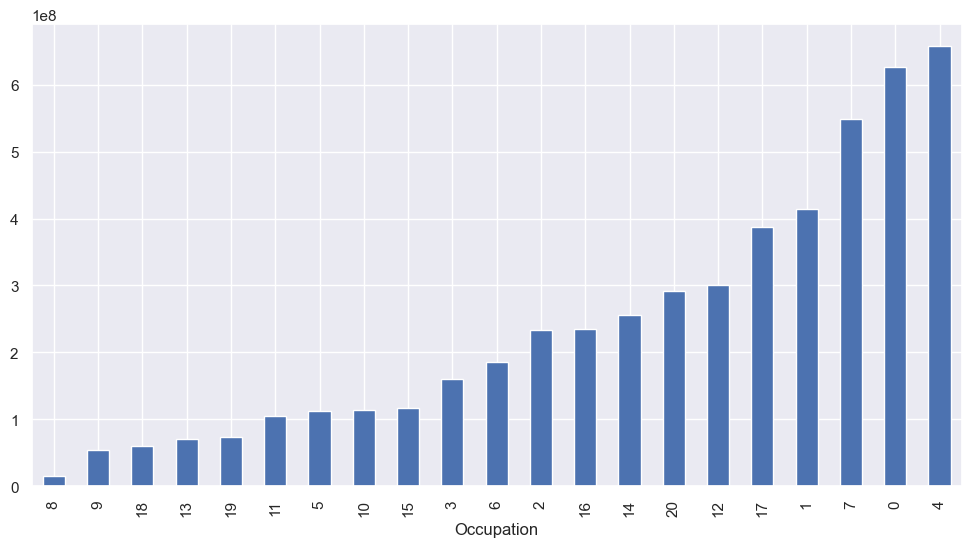

In [69]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:title={'center':'Average spent by occupasion'}, xlabel='Occupation'>

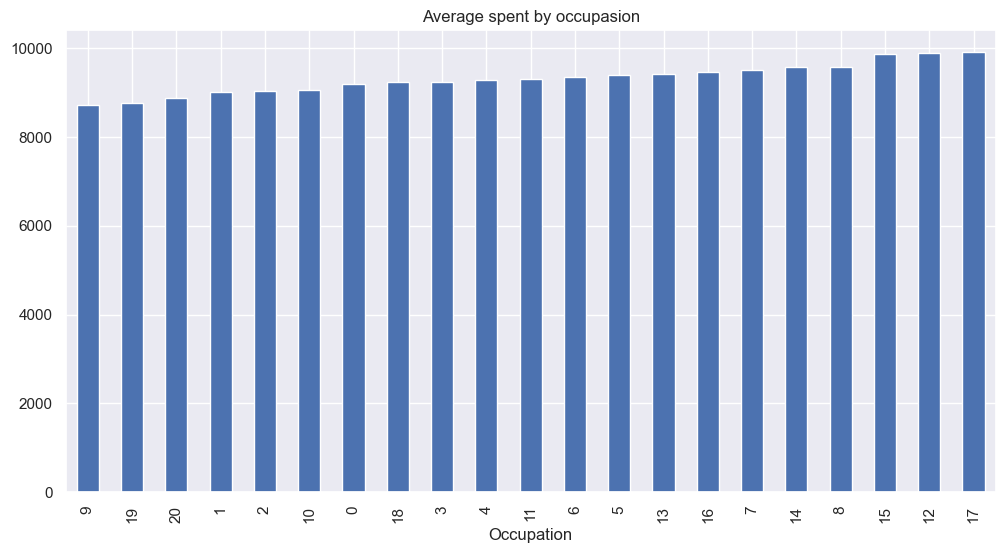

In [71]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(title="Average spent by occupasion",kind='bar')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

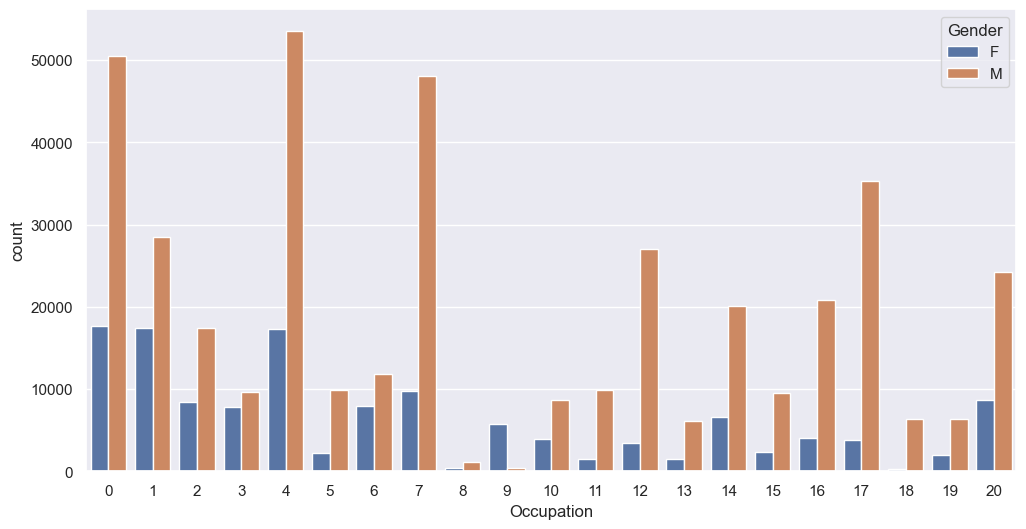

In [73]:
sns.countplot(x='Occupation',hue="Gender",data=df)

<AxesSubplot:xlabel='Occupation'>

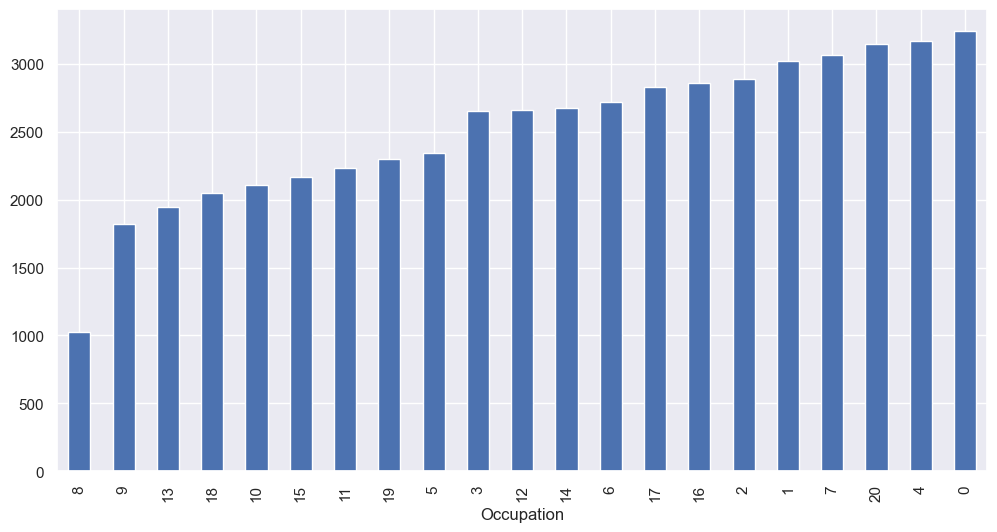

In [76]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

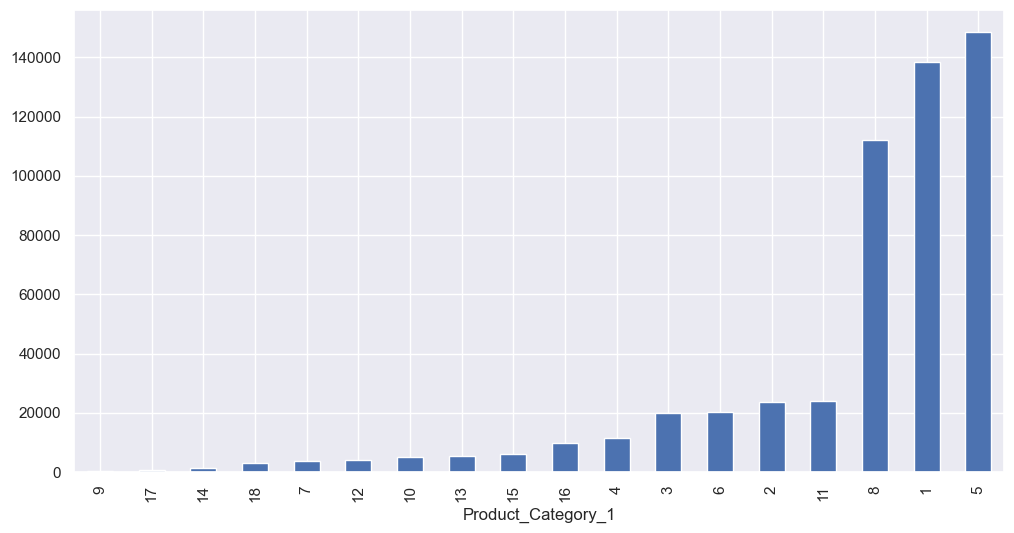

In [78]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

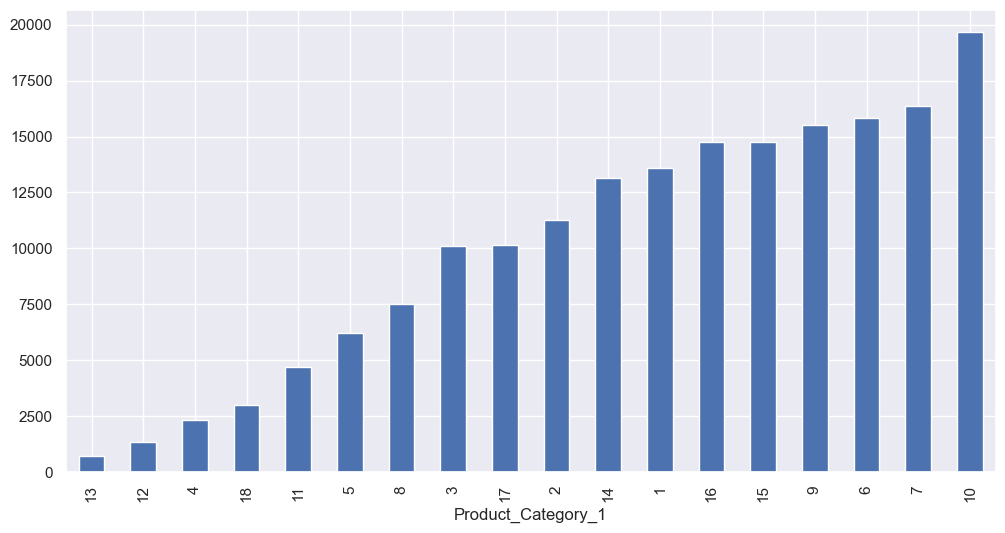

In [80]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_ID'>

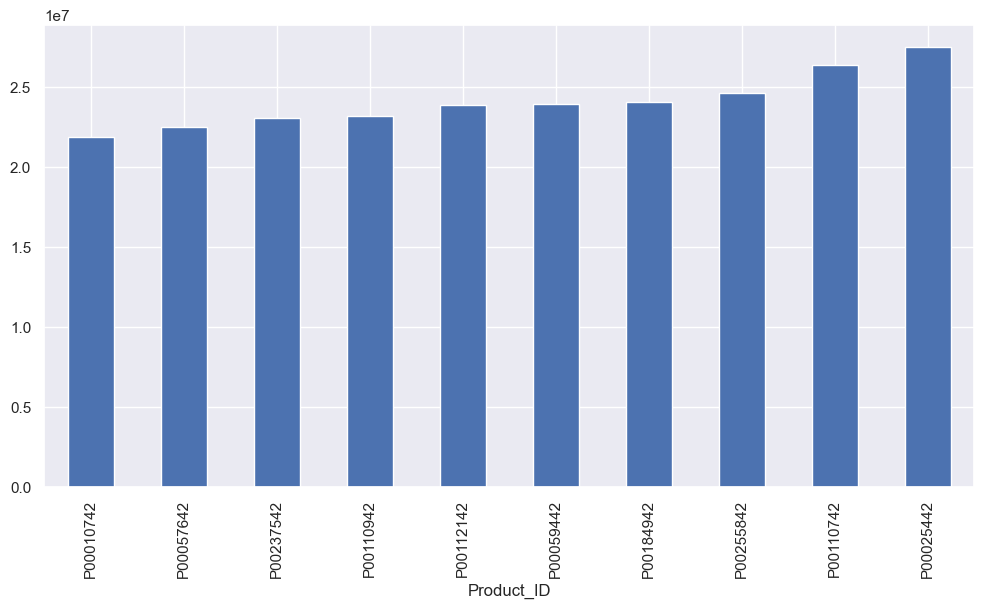

In [81]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind='bar')  

# Combining gender and marital status

In [82]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [89]:
l=[]

for i in range(len(df)):
    l.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))
df['MaritalGender']=l
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

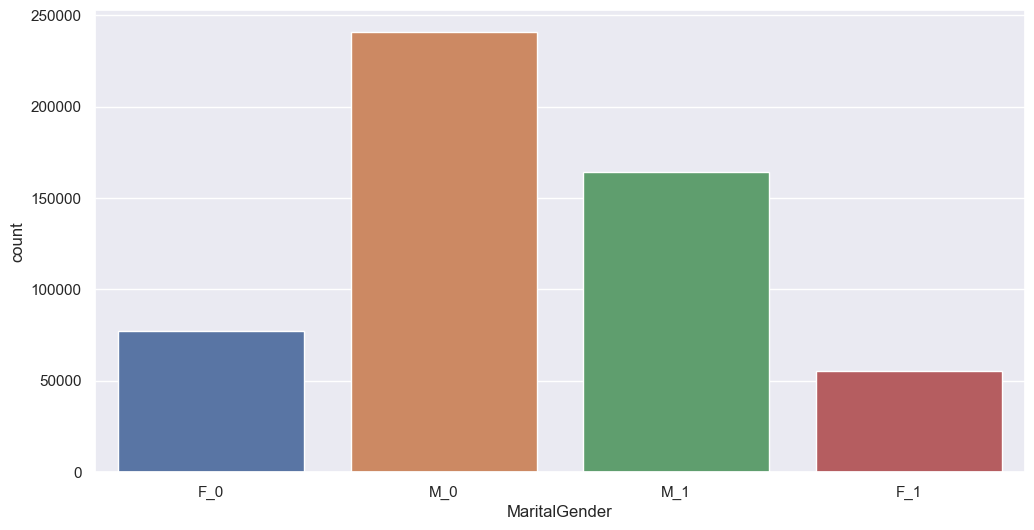

In [90]:
sns.countplot(x=df['MaritalGender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

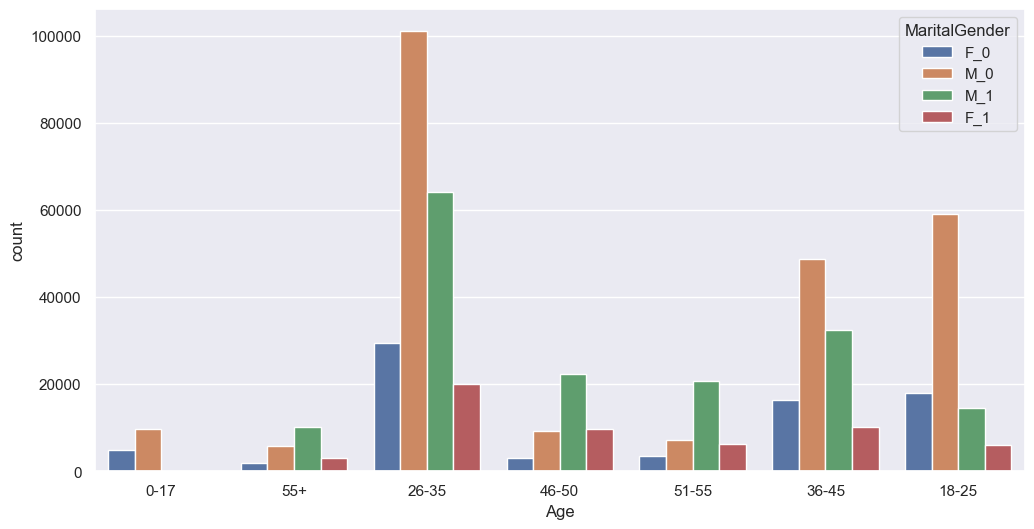

In [91]:
sns.countplot(x=df['Age'],hue=df['MaritalGender'])

By looking at insights of dataset we can conclude that man unmarried spends the most in black friday sale the order is:
1.Male unmarried
2.Male married
3.Female unmarried
4.Female married